In [13]:
import json
import pandas as pd
import matplotlib

In [14]:
def read_data(model_type):
    with open(f"outputs/{model_type}_results.json", "r", encoding="utf-8") as f:
        results = json.load(f)
        # del results["test_loss"]

        results = pd.DataFrame(results)

        return results
def plot_result_line(results, y, model_type):
        results.plot.line(x="epoch", y=y, label=f"Training Loss for {model_type}")

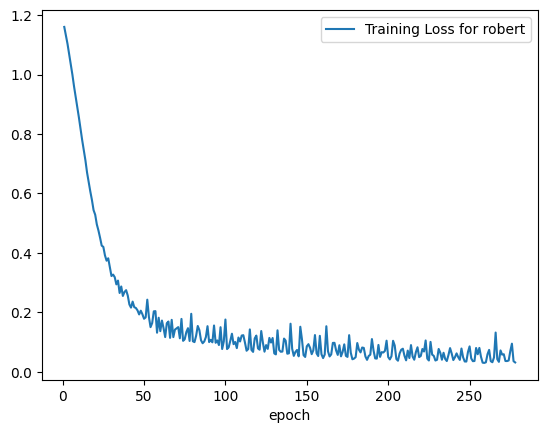

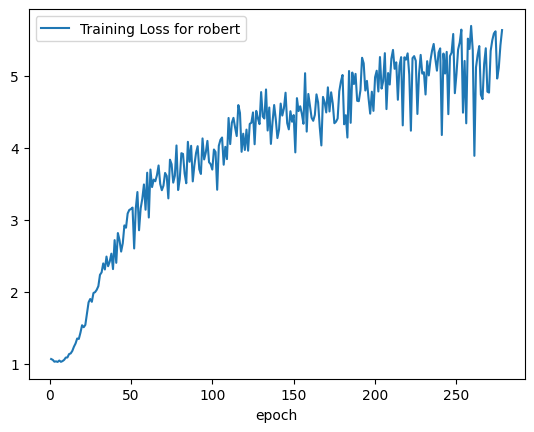

In [15]:
model_type = "robert"
results = read_data(model_type)
plot_result_line(results, "train_loss", model_type)
plot_result_line(results, "test_loss", model_type)

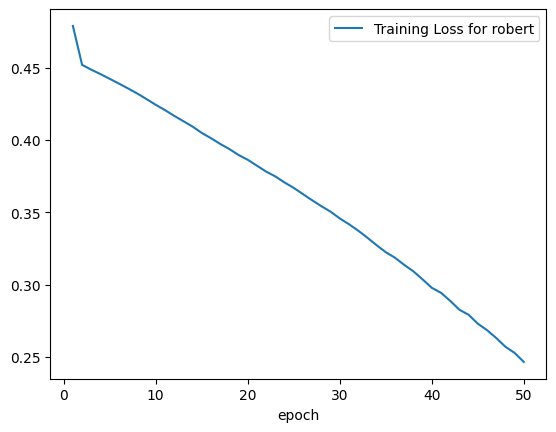

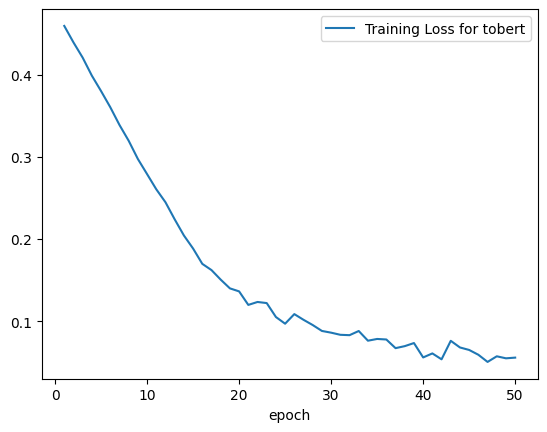

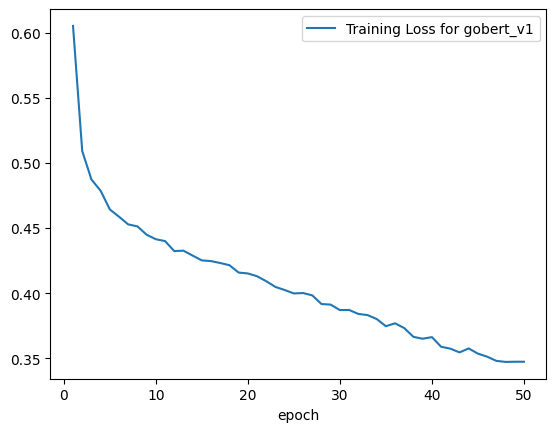

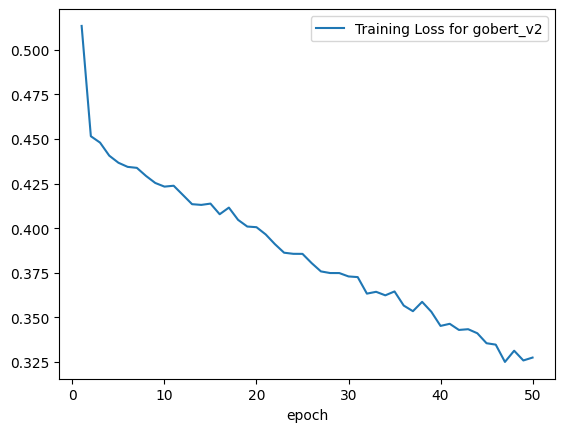

In [4]:
comp_results = {
    "model_type": [],
    "acc": [],
    "pre": [],
    "rec": [],
    "f1": [],
    "tp": [],
    "fp": [],
    "tn": [],
    "fn": [],
}

for model_type in ["robert", "tobert", "gobert_v1", "gobert_v2"]:
    results = read_data(model_type)
    plot_result_line(results, "train_loss", model_type)
    comp_results["model_type"].append(model_type)
    comp_results["acc"].append(list(results["test_acc"])[-1])
    comp_results["pre"].append(list(results["test_precision"])[-1])
    comp_results["rec"].append(list(results["test_recall"])[-1])
    comp_results["f1"].append(list(results["test_f1"])[-1])
    comp_results["tp"].append(list(results["tp"])[-1])
    comp_results["fp"].append(list(results["fp"])[-1])
    comp_results["tn"].append(list(results["tn"])[-1])
    comp_results["fn"].append(list(results["fn"])[-1])

In [5]:
comp_results = pd.DataFrame(comp_results)
print(comp_results.to_string(index=False))

model_type      acc      pre      rec       f1  tp  fp  tn  fn
    robert 0.820837 0.148936 0.046358 0.070707   7  40 836 144
    tobert 0.735151 0.231111 0.344371 0.276596  52 173 703  99
 gobert_v1 0.796495 0.177778 0.105960 0.132780  16  74 802 135
 gobert_v2 0.812074 0.223684 0.112583 0.149780  17  59 817 134
